In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from src.helpers.dataset_helpers import get_train_valid_test, image_generator, create_tf_dataset, join_l_ab
import src.consts as c

from skimage import color

In [2]:
tf.__version__

'2.0.0'

In [3]:
def compare_model_label(model, l, ab):
    plt.figure(figsize=(10, 30))

    plt.subplot(1,3,1)
    plt.imshow(l[:,:,0], cmap=plt.cm.gray)

    plt.subplot(1,3,2)
    plt.imshow(join_l_ab(l, ab), cmap=plt.cm.binary)

    plt.subplot(1,3,3)
    output = model.predict(np.array([l], dtype=float))
    plt.imshow(join_l_ab(l, output), cmap=plt.cm.binary)

    plt.show()

# Training

In [4]:
from src.model.train_model import train_model

TensorBoard(log_dir='/output')
model = train_model()

train images size 8366, valid images size 464, batch_size 1
Train for 5 steps, validate for 5 steps
Epoch 1/30
5/5 [==============================] - 5s 952ms/step - loss: 0.4394 - accuracy: 0.4673 - val_loss: 0.0265 - val_accuracy: 0.4286
Epoch 2/30
5/5 [==============================] - 2s 446ms/step - loss: 0.1725 - accuracy: 0.5504 - val_loss: 0.0310 - val_accuracy: 0.5110
Epoch 3/30
5/5 [==============================] - 2s 424ms/step - loss: 0.1777 - accuracy: 0.5053 - val_loss: 0.0837 - val_accuracy: 0.5112
Epoch 4/30
5/5 [==============================] - 2s 422ms/step - loss: 0.1101 - accuracy: 0.4399 - val_loss: 0.0979 - val_accuracy: 0.5128
Epoch 5/30
5/5 [==============================] - 2s 419ms/step - loss: 0.0769 - accuracy: 0.5091 - val_loss: 0.0669 - val_accuracy: 0.5130
Epoch 6/30
5/5 [==============================] - 2s 414ms/step - loss: 0.0549 - accuracy: 0.3828 - val_loss: 0.1037 - val_accuracy: 0.5114
Epoch 7/30
5/5 [==============================] - 3s 516ms/s

In [5]:
train_paths, _, test_paths = get_train_valid_test(c.DATASET_PATH)
test_data = create_tf_dataset(test_paths)

In [6]:
model.evaluate(test_data, steps=5)

5/5 [==============================] - 0s 81ms/step - loss: 0.0139 - accuracy: 0.5231


[0.013875925168395042, 0.5230896]

In [7]:
train_gen = image_generator(train_paths)
test_gen = image_generator(test_paths)

## Images from Train set

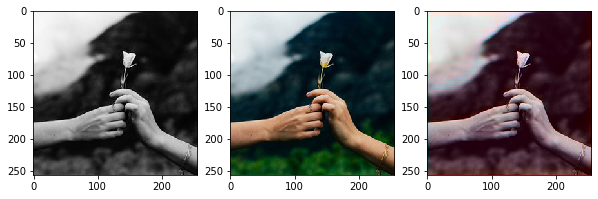

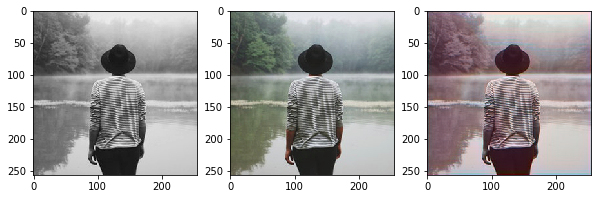

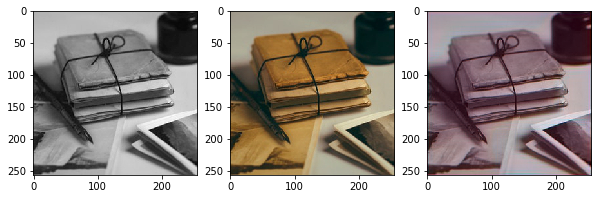

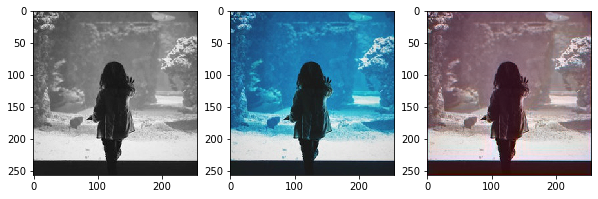

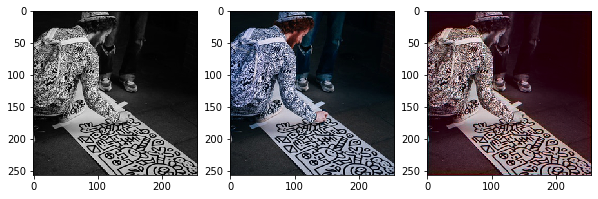

In [8]:
for i in range(5):
    l, ab = next(train_gen)
    compare_model_label(model, l, ab)

## Images from Test set

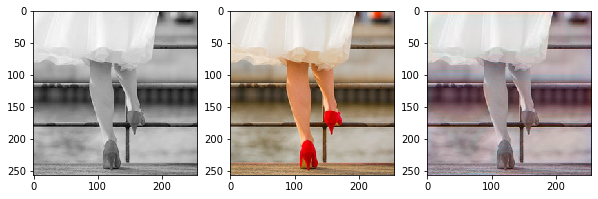

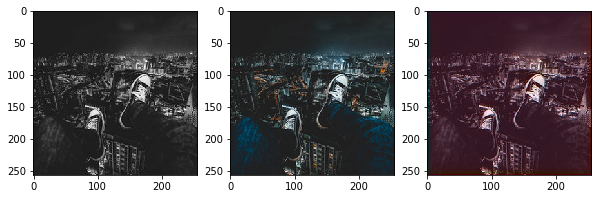

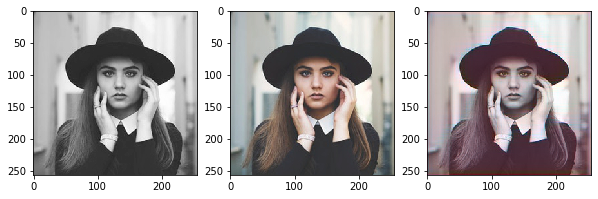

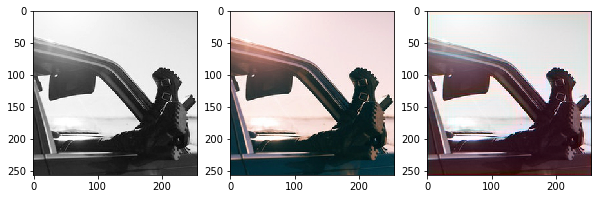

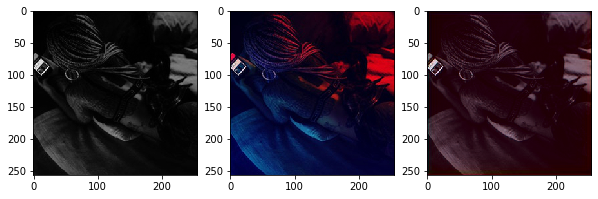

In [9]:
for i in range(5):
    l, ab = next(test_gen)
    compare_model_label(model, l, ab)